In [63]:
# 5.1 (16 points) The file www.nbi.dk/∼petersen/data DecayTimes.csv contains the measured
# decay times (ti
# in s) of a Bohrium isotope. The true decay times follow an exponential function,
# but the measurement of the decay times given have a Gaussian resolution G(0, σ) (thus no bias).
# • Plot the distribution of decay times, and calculate the mean and median with uncertainty.
# • Give a rough estimate of the decay time λ from fitting the tail of the distribution.
# • Give a rough estimate of the Gaussian resolution, σ.
# • Try to fit the entire distribution, and reassess the estimated values of λ and σ.

In [64]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


In [65]:
url="http://www.nbi.dk/~petersen/data_DecayTimes.csv"
dataframe = pd.read_csv(url, header=None)
dataframe

,0
0,0.49073
1,2.65275
2,1.35328
3,1.00767
4,0.27649
...,...
995,-0.17084
996,2.29557
997,0.13531
998,2.82462


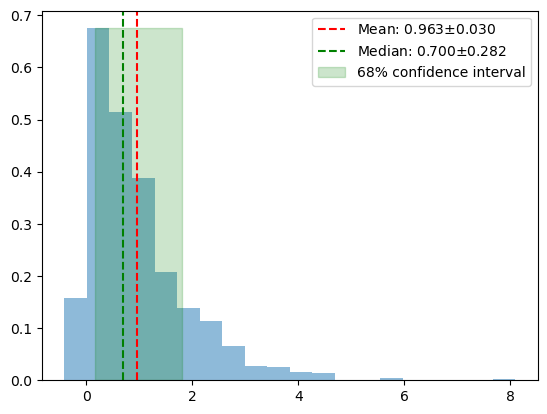

In [66]:
#5.1.1
fig, ax = plt.subplots()
counts, bins, _ = ax.hist(dataframe[0], bins=20, density=True, alpha=0.5)

# Calculate the mean and standard deviation of the data
mean = np.mean(dataframe[0])
std_dev = np.std(dataframe[0])

median = np.median(dataframe[0])
lower, upper = np.percentile(dataframe[0], [16, 84])  #calculate the 68% interval
median_uncertainty = np.abs(median - np.mean([lower, upper]))
n = len(dataframe[0])
std_err = std_dev / np.sqrt(n)
# Add the mean, median and their uncertainties to the plot
ax.axvline(mean, color='r', linestyle='--', label=f"Mean: {mean:.3f}$\pm${std_err:.3f}")
ax.axvline(median, color='g', linestyle='--', label=f'Median: {median:.3f}$\pm${median_uncertainty:.3f}')
ax.fill_between([lower, upper], 0, counts.max(), color='g', alpha=0.2, label="68% confidence interval")

# Add a legend to the plot
ax.legend()

# Show the plot
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the single exponential decay function
def decay(t, lam):
    return np.exp(-lam*t)
# Set the tail region to fit (e.g., last 4 data points)
tail_start = -300

# Extract the tail data
tail_data = dataframe[tail_start:]

# Define the time axis for plotting
t = np.arange(len(dataframe[0]))

# Fit the tail data to the single exponential decay model
popt, pcov = curve_fit(decay, t[tail_start:], tail_data)

# Extract the decay constant (lambda) and its uncertainty from the fitted parameters
lam = popt[0]
lam_err = np.sqrt(np.diag(pcov))[0]

# Plot the data and fitted curve
plt.plot(t, dataframe[0], 'bo', label='Data')
plt.plot(t[tail_start:], decay(t[tail_start:], *popt), 'r-', label='Fit')
plt.xlabel('Time')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Print the decay constant and its uncertainty
print(f"Decay constant: {lam:.3f} +/- {lam_err:.3f}")


ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.